<font size=6><b>Lec04. Image Argumentation (이미지 증강)</b></font><br>
tfds.image_classification.FashionMNIST
<br>
* ref : https://keras.io/api/preprocessing/image/
* ref : https://www.tensorflow.org/datasets/catalog/fashion_mnist
* ref : 홈페이지 : https://github.com/zalandoresearch/fashion-mnist
* ref : 소스 코드 : https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/image_classification/mnist.py



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation                 #-------------FC
from keras.layers import Conv2D, MaxPooling2D,Flatten      #-------------CNN
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint  #------------ callback

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import fashion_mnist


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
#(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)


# seed 고정

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

# colab

In [ ]:
# colab
from google.colab import drive
drive.mount("/content/gdrive")

# Data Load

In [ ]:
#ML : X_train, X_test, y_test, y_test = train_test_split()

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()  # [(arr),(arr)]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

# EDA

In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[:30].shape

(30, 28, 28)

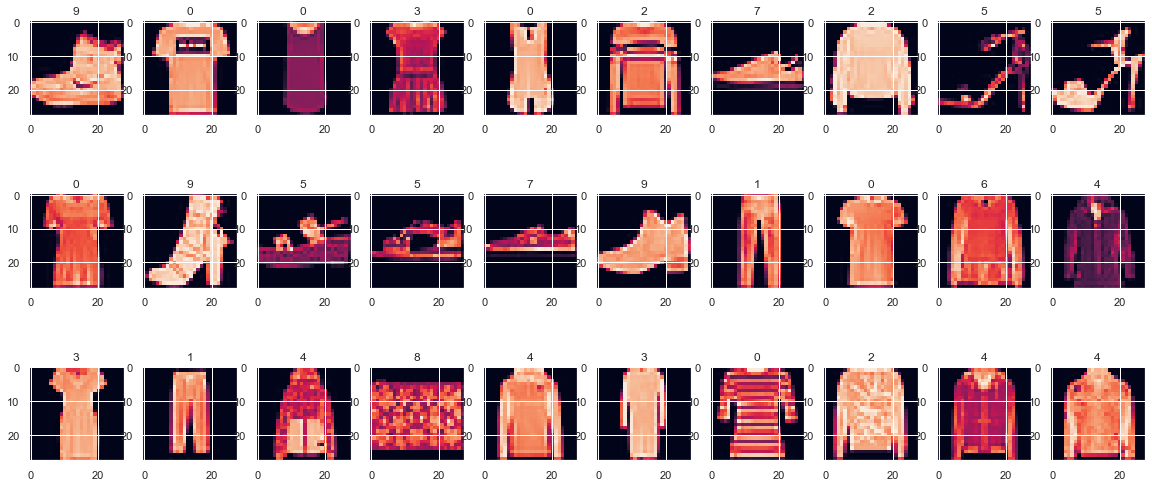

In [ ]:
import matplotlib.pyplot as plt
p, axes = plt.subplots(3, 10, figsize=(20,9))

for i, x in enumerate( range(X_train[:30].shape[0])):  #range(30)):
    r = i // 10
    c = i % 10
    axes[r][c].imshow(X_train[x])   #, cmap=pyplot.get_cmap('gray'))
    axes[r][c].set_title(y_train[x])
# plt.show()

In [ ]:
LABEL__ = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat',  'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# (Optional) 데이터 샘플링
* 속도 문제로 일부만 테스트

In [ ]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

print("원본:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_9, X_train, y_9, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=1234, stratify=y_train) # 데이터셋 골고루 들어가라고
X_9, X_test,  y_9, y_test  = train_test_split(X_test,  y_test,  test_size=0.1, random_state=1234, stratify=y_test)

print(pd.Series(y_train).value_counts()) # 전체 train데이터와 같이 균등 분포임을 확인
print("원본10%:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

원본: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
9    600
8    600
7    600
1    600
3    600
2    600
4    600
5    600
0    600
6    600
dtype: int64
원본10%: (6000, 28, 28) (6000,) (1000, 28, 28) (1000,)


# 전처리 & 가공

## X피쳐 픽셀값 정규화
* 0 ~ 255 : 스케일링(MinMaxScaler)

In [ ]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test  / 255.0

* <font color=red><b>CNN 모델 : shape(이미지갯수, H, W, 컬러) </b></font>

In [ ]:
X_train_scaler = X_train_scaler.reshape(-1, 28, 28, 1)    #1:흑백  3:RGB(컬러)
X_test_scaler  = X_test_scaler.reshape(-1, 28, 28, 1)     #1:흑백  3:RGB(컬러)
print(X_train_scaler.shape, X_test_scaler.shape)

(6000, 28, 28, 1) (1000, 28, 28, 1)


## y레이블 원핫인코딩
*  (integers in range 0-9)

In [ ]:
y_train_oh = to_categorical( y=y_train, num_classes=10, dtype='int32')
y_test_oh  = to_categorical( y=y_test,  num_classes=10, dtype='int32')

# CNN 모델 구축

In [ ]:
INPUT_SHAPE__  = (28, 28, 1)                    #------------------- 주의주의주의
NUM_CLASS__    = 10                             #------------------- 총10개분류
ACTIVATION__   = "softmax"                      #------------------- sigmoid
LOSS__         = 'categorical_crossentropy'     #------------------- binary_crossentropy , sparse_crossentropy

#----------------------------------------------------------
model = Sequential([
    Conv2D(16, kernel_size=(3,3), input_shape=INPUT_SHAPE__ , activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3,3),  activation='relu'),        
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # ------------------------------- FC(Affine) -----------
    Dense(units=128, activation='relu'),
    Dense(units=NUM_CLASS__, activation=ACTIVATION__)  #다중분류 예측(0~9)

])
model.compile(loss=LOSS__,  optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.summary()

# 학습 & 평가
<font color=red><b> X는 스케일된 데이터, y는 원핫인코딩 데이터 

## 전역 변수 설정(EPOCHS__,BATCH_SIZE__)

In [ ]:
EPOCHS__      = 100
BATCH_SIZE__  = 32
PATIENCE__    = 5

## Callback 설정
ref : https://keras.io/api/callbacks/<br>  
<font color=black>* callback 기능 : Usage of callbacks via the built-in fit() loop <br>
  <font color=black>* Write TensorBoard logs after every batch of training to monitor your metrics <br>
  <font color=red>* Periodically save your model to disk  ----------------- 모델저장 <br>
  <font color=red>* Do early stopping   ----------------------------------- 오버피팅 시 조기종료 <br>
  <font color=black>* Get a view on internal states and statistics of a model during training    

In [ ]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 모델 저장 폴더
import os
if not os.path.exists("./model"):
    os.mkdir('./model')

In [ ]:
MY_CALLBACKS__ = [
    EarlyStopping(patience=PATIENCE__),          #------------PATIENCE__ : 조기종료
    ModelCheckpoint(filepath='./model/mymodel_{epoch:02d}_{val_loss:.4f}.h5',
                    monitor='val_loss',          #------------어떤 점수를 기준으로 모니터링할까
                    save_best_only=True,         #------------이전보다 좋아질때만 저장
                    save_weights_only=False      #------------모델+가중치 같이 저장
                   )  # 이전 epoch 점수보다 현재 점수가 좋으면 모델 저장 : mymodel_03_2417.h5
] 

## 학습

In [ ]:
res = model.fit(X_train_scaler, 
                y_train_oh, 
                epochs=EPOCHS__, 
                batch_size=BATCH_SIZE__,        #128바이트씩 읽어라
                validation_split=0.1,           #학습:54만 ,  내부검증:6만
                callbacks=MY_CALLBACKS__        #----------- 옵션
               )

Epoch 1/100
169/169 [==============================] - 2s 10ms/step - loss: 1.0001 - accuracy: 0.6502 - val_loss: 0.5720 - val_accuracy: 0.7867
Epoch 2/100
169/169 [==============================] - 2s 10ms/step - loss: 0.6066 - accuracy: 0.7672 - val_loss: 0.5364 - val_accuracy: 0.8117
Epoch 3/100
169/169 [==============================] - 2s 10ms/step - loss: 0.5296 - accuracy: 0.8057 - val_loss: 0.5076 - val_accuracy: 0.8000
Epoch 4/100
169/169 [==============================] - 2s 9ms/step - loss: 0.4741 - accuracy: 0.8230 - val_loss: 0.4574 - val_accuracy: 0.8550
Epoch 5/100
169/169 [==============================] - 2s 9ms/step - loss: 0.4307 - accuracy: 0.8396 - val_loss: 0.4337 - val_accuracy: 0.8533
Epoch 6/100
169/169 [==============================] - 2s 9ms/step - loss: 0.4004 - accuracy: 0.8533 - val_loss: 0.4324 - val_accuracy: 0.8433
Epoch 7/100
169/169 [==============================] - 2s 9ms/step - loss: 0.3764 - accuracy: 0.8607 - val_loss: 0.4553 - val_accuracy: 0.8

## 평가

In [ ]:
loss_categorical_crossentropy , metrics_accuracy = model.evaluate(X_test_scaler, y_test_oh)

32/32 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8520


# 학습 시각화

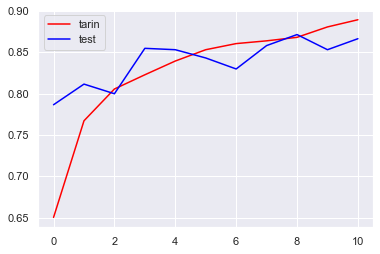

In [ ]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='tarin')
plt.plot(np.arange(len(res.history['accuracy'])), res.history['val_accuracy'], c='blue', label='test')
plt.legend()
plt.show()

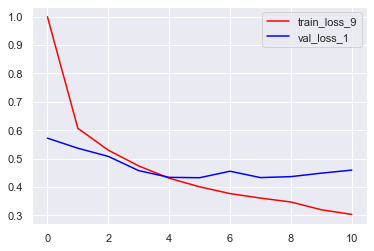

In [ ]:
plt.plot(np.arange(len(res.history['val_loss'])), res.history['loss'], c='red', label='train_loss_9')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss_1')
plt.legend()
plt.show()

<font color=red><b>32/32 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8520

---

# 이미지 증강 : 픽셀을 array(28,28) 값으로 가지고 있는 경우
* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
* https://keras.io/ko/preprocessing/image/

## 이미지 보기

In [ ]:
LABEL__[9], X_train_scaler.shape , X_test_scaler.shape 

('Ankle boot', (6000, 28, 28, 1), (1000, 28, 28, 1))

### matplot

In [ ]:
# LABEL__ = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat',  'Sandal','Shirt','Sneaker','Bag','Ankle boot']
argmax_i = np.argmax(y_train_oh[0])
X_train_scaler[0].shape,  LABEL__[argmax_i]

((28, 28, 1), 'Ankle boot')

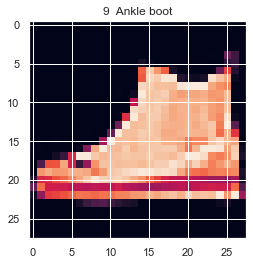

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train_scaler[0])  #(28, 28, 1)
plt.title(f"{argmax_i}  {LABEL__[argmax_i]}")
plt.show()

### keras api

In [ ]:
# from PIL import Image
# # from keras.utils.img_to_array
# from keras.preprocessing.image import array_to_img, img_to_array, load_image
# img   = array_to_img(X_train_scaler[0])
# array = img_to_array(img)
# load_image(img)
# print(array)

## ImageDataGenerator()

<pre>
generator = ImageDataGenerator(featurewise_center=False, samplewise_center=False, 
                               featurewise_std_normalization=False, 
                               samplewise_std_normalization=False, 
                               zca_whitening=False, zca_epsilon=1e-06, 
                               rotation_range=0, width_shift_range=0.0, 
                               height_shift_range=0.0, brightness_range=None, 
                               shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
                               fill_mode='nearest', cval=0.0, 
                               horizontal_flip=False, vertical_flip=False, 
                               rescale=None, 
                               preprocessing_function=None, 
                               data_format=None, 
                               validation_split=0.0, dtype=None)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
#================================= train만 증강 ===========================================
train_generator = ImageDataGenerator( #rescale=1./255,             #----------0 ~ 255 : 스케일링(MinMaxScaler)
                                    featurewise_center=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    #horizontal_flip=True,
                                    #vertical_flip=True
                                    )

#================================= test 증강XXXXXXXXXXXXXXXXXXXXXx =========================
test_generator = ImageDataGenerator( ) #rescale=1./255 #----------0 ~ 255 : 스케일링(MinMaxScaler)


## generator.flow(X,y,batch_size=n)

In [ ]:
# BATCH_SIZE__  = 32

train_flow = train_generator.flow(X_train_scaler, y_train_oh, batch_size=BATCH_SIZE__)
test_flow  = test_generator.flow(X_test_scaler, batch_size=1)

## model.fit_generator(flow,..)  --> fit()

In [ ]:
len(X_train_scaler)

6000

In [ ]:
len(X_train_scaler) / BATCH_SIZE__

187.5

In [ ]:
# res = model.fit(X_train_scaler, 
#                 y_train_oh, 
#                 epochs=EPOCHS__, 
#                 batch_size=BATCH_SIZE__,        #128바이트씩 읽어라
#                 validation_split=0.1,           #학습:54만 ,  내부검증:6만
#                 callbacks=MY_CALLBACKS__        #----------- 옵션
#                )

In [ ]:
res = model.fit(train_flow, 
                epochs=EPOCHS__, 
                steps_per_epoch= len(X_train_scaler) / BATCH_SIZE__,
                #batch_size=BATCH_SIZE__,
                #validation_data=val_generator,
               )

Epoch 1/100
187/187 [==============================] - 2s 10ms/step - loss: 1.1295 - accuracy: 0.5860
Epoch 2/100
187/187 [==============================] - 2s 10ms/step - loss: 0.8435 - accuracy: 0.6922
Epoch 3/100
187/187 [==============================] - 2s 10ms/step - loss: 0.7791 - accuracy: 0.7042
Epoch 4/100
187/187 [==============================] - 2s 10ms/step - loss: 0.7338 - accuracy: 0.7252
Epoch 5/100
187/187 [==============================] - 2s 10ms/step - loss: 0.7136 - accuracy: 0.7270
Epoch 6/100
187/187 [==============================] - 2s 10ms/step - loss: 0.6993 - accuracy: 0.7277
Epoch 7/100
187/187 [==============================] - 2s 10ms/step - loss: 0.6744 - accuracy: 0.7415
Epoch 8/100
187/187 [==============================] - 2s 10ms/step - loss: 0.6620 - accuracy: 0.7473
Epoch 9/100
187/187 [==============================] - 2s 10ms/step - loss: 0.6667 - accuracy: 0.7452
Epoch 10/100
187/187 [==============================] - 2s 10ms/step - loss: 0.651

In [ ]:
# EPOCHS__      = 100
# model.fit_generator(  train_flow,
#                       epochs=EPOCHS__,
#                       steps_per_epoch= len(X_train_scaler) / BATCH_SIZE__,
#                       
#                    )

<pre>
증강 전 최대 학습<br>
Epoch 11/100
169/169 [==============================] - 2s 9ms/step - loss: 0.3030 - accuracy: 0.8896 - val_loss: 0.4593 - val_accuracy: 0.8667
 
증강 후 최대 학습<br>    
Epoch 100/100
187/187 [==============================] - 2s 9ms/step - loss: 0.4108 - accuracy: 0.8425

In [ ]:
loss_categorical_crossentropy , metrics_accuracy = model.evaluate_generator(train_flow)
print(loss_categorical_crossentropy , metrics_accuracy)

0.4047292470932007 0.8443333506584167


* 연습용 : 이미지 증강 만들기

In [ ]:
# import time
# for e in range(10):
#     print('Epoch', e)
#     batch_cnt = 0    #-----------------batch_size=32
#     for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=32):
#         model.fit(X_batch, y_batch)
#         batch_cnt += 1
        
#         if batch_cnt >= len(X_train) / 32:    #예: train(320장) - batch_size(32) ====> 총 증강된 이미지(10장)
#             break                             #예: train(320장) - batch_size(16) ====> 총 증강된 이미지(20장)
#         time.sleep(500)    

## predict_generator()

In [ ]:
pred = model.predict_generator(test_flow)
# predict the class label
pred_classes = pred.argmax(axis=-1)
print(pred_classes)

# 이미지 증강 : 폴더의 이미지를 증강시킬 경우

* 이미지 증강을 위해선 반드시 3단 디렉토리 구조를 가져갈 것

<pre>
train/              -------------------- 최상위폴더
...cat/              -------------------- 서브폴더 : 분류클래스
......cat_1.jpg   --------------------관련 이미지
......cat_2.jpg
...dog/
......dog_1.jpg
......dog_2.jpg

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_list = image_dataset_from_directory(dir)
